In [1]:
import numpy as np
import pandas as pd

In [2]:
autos  = pd.read_csv("Dataset/autos.csv")
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [4]:
autos['price'].value_counts()

price
9279     2
18150    2
7775     2
8845     2
8921     2
        ..
6189     1
6669     1
7689     1
9959     1
22625    1
Name: count, Length: 178, dtype: int64

In [6]:
autos[autos['price']==18150]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
108,0,peugot,gas,turbo,4,sedan,rwd,front,108.0,186.7,...,134,mpfi,3.61,3.21,7,142,5600,18,24,18150
124,3,saab,gas,turbo,2,hatchback,fwd,front,99.1,186.6,...,121,mpfi,3.54,3.07,9,160,5500,19,26,18150


### Target Encoding

* A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target
* A simple and effective version is to apply a group aggregation from Lesson 3, like the mean. Using the Automobiles dataset, this computes the average price of each vehicle's make:

In [7]:
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

In [8]:
autos[["make", "price", "make_encoded"]].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


This kind of target encoding is sometimes called a mean encoding. Applied to a binary target, it's also called bin counting. (Other names you might come across include: likelihood encoding, impact encoding, and leave-one-out encoding.)

#### Smoothing
* A solution to these problems is to add smoothing.
* The idea is to blend the in-category average with the overall average.
* Rare categories get less weight on their category average, while missing categories just get the overall average.

encoding = weight * in_category + (1 - weight) * overall

#### weight

*  where weight is a value between 0 and 1 calculated from the category frequency.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [12]:

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Dataset/movielens1m.csv')
df.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Movie ID            1000209 non-null  object
 1   Action              1000209 non-null  int64 
 2   Adventure           1000209 non-null  int64 
 3   Animation           1000209 non-null  int64 
 4   Children            1000209 non-null  int64 
 5   Comedy              1000209 non-null  int64 
 6   Crime               1000209 non-null  int64 
 7   Documentary         1000209 non-null  int64 
 8   Drama               1000209 non-null  int64 
 9   Fantasy             1000209 non-null  int64 
 10  Film-Noir           1000209 non-null  int64 
 11  Horror              1000209 non-null  int64 
 12  IMAX                1000209 non-null  int64 
 13  Musical             1000209 non-null  int64 
 14  Mystery             1000209 non-null  int64 
 15  Romance             1000209 non-

In [15]:
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Movie ID            1000209 non-null  object
 1   Action              1000209 non-null  uint8 
 2   Adventure           1000209 non-null  uint8 
 3   Animation           1000209 non-null  uint8 
 4   Children            1000209 non-null  uint8 
 5   Comedy              1000209 non-null  uint8 
 6   Crime               1000209 non-null  uint8 
 7   Documentary         1000209 non-null  uint8 
 8   Drama               1000209 non-null  uint8 
 9   Fantasy             1000209 non-null  uint8 
 10  Film-Noir           1000209 non-null  uint8 
 11  Horror              1000209 non-null  uint8 
 12  IMAX                1000209 non-null  uint8 
 13  Musical             1000209 non-null  uint8 
 14  Mystery             1000209 non-null  uint8 
 15  Romance             1000209 non-

In [21]:
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [22]:
df.shape

(1000209, 28)

In [17]:
X = df.copy()
y = X.pop('Rating')

In [18]:
X.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,b'50021'
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,b'22307'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,b'60073'
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,b'15217'


In [19]:
y.head()

0    5
1    4
2    1
3    5
4    4
Name: Rating, dtype: uint8

In [23]:
X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [24]:
X_encode.head()


,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
895999,b'1225',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'5472',35,1,0,b'27909'
531298,b'3079',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'4579',18,0,17,b'63332'
514755,b'2026',0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'3491',25,1,16,b'28542'
26070,b'2623',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'4486',35,1,7,b'98674'
196514,b'1371',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'3028',1,1,17,b'12701'


In [25]:
!pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB 4.5 MB/s eta 0:00:00


In [28]:
from category_encoders import MEstimateEncoder

In [30]:
encoder = MEstimateEncoder(cols=['Zipcode'],m=5.0)

In [31]:
encoder

MEstimateEncoder(cols=['Zipcode'], m=5.0)

In [32]:
# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

MEstimateEncoder(cols=['Zipcode'], m=5.0)

In [33]:
X_pretrain.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,b'50021'
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,b'22307'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,b'60073'
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,b'60626'


In [34]:
X_train = encoder.transform(X_pretrain)
X_train

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.594528
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,3.122577
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.469443
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,3.665585
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,3.560205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000201,b'2762',0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,b'1934',25,1,18,3.789847
1000203,b'2915',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3792',25,1,4,3.559757
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,3.869639
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,3.458879


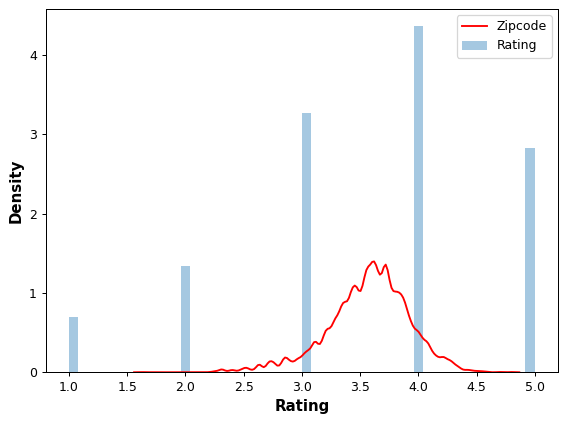

In [35]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);

In [36]:
seed = 321

In [37]:
np.random.seed(seed)
target = list(np.random.randint(0, 2, 20))

In [38]:
target

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

In [39]:
genre = ["Sci Fi", "Drama", "Romance", "Fantasy", "Nonfiction"]

In [40]:
np.random.seed(seed)
genres = [genre[i] for i in np.random.randint(0, len(genre), 20)]

In [41]:
genres

['Nonfiction',
 'Romance',
 'Nonfiction',
 'Drama',
 'Sci Fi',
 'Drama',
 'Sci Fi',
 'Romance',
 'Sci Fi',
 'Nonfiction',
 'Sci Fi',
 'Fantasy',
 'Fantasy',
 'Drama',
 'Fantasy',
 'Romance',
 'Nonfiction',
 'Fantasy',
 'Romance',
 'Romance']

In [42]:
df = pd.DataFrame({"genre" : genres, "target" : target})
df.head()

,genre,target
0,Nonfiction,0
1,Romance,0
2,Nonfiction,0
3,Drama,1
4,Sci Fi,1


In [43]:
df['target'].value_counts()

target
0    11
1     9
Name: count, dtype: int64

In [44]:
df['genre'].value_counts()

genre
Romance       5
Nonfiction    4
Sci Fi        4
Fantasy       4
Drama         3
Name: count, dtype: int64

In [45]:
categories = df['genre'].unique()
targets = df['target'].unique()

In [46]:
cat_list = [] 

In [47]:
for cat in categories:
    aux_dict = {}
    aux_dict['category'] = cat
    aux_df = df[df['genre'] == cat]
    counts = aux_df['target'].value_counts()
    aux_dict['count'] = sum(counts)
    for t in targets:
        aux_dict['target_' + str(t)] = counts[t]
    cat_list.append(aux_dict)

In [48]:
cat_list

[{'category': 'Nonfiction', 'count': 4, 'target_0': 3, 'target_1': 1},
 {'category': 'Romance', 'count': 5, 'target_0': 4, 'target_1': 1},
 {'category': 'Drama', 'count': 3, 'target_0': 1, 'target_1': 2},
 {'category': 'Sci Fi', 'count': 4, 'target_0': 2, 'target_1': 2},
 {'category': 'Fantasy', 'count': 4, 'target_0': 1, 'target_1': 3}]

In [49]:
cat_list = pd.DataFrame(cat_list)
cat_list.head()

,category,count,target_0,target_1
0,Nonfiction,4,3,1
1,Romance,5,4,1
2,Drama,3,1,2
3,Sci Fi,4,2,2
4,Fantasy,4,1,3


In [50]:
cat_list['genre_encoded_prob_1'] = cat_list['target_1'] / cat_list['count']

In [51]:
cat_list.head()

,category,count,target_0,target_1,genre_encoded_prob_1
0,Nonfiction,4,3,1,0.250000
1,Romance,5,4,1,0.200000
2,Drama,3,1,2,0.666667
3,Sci Fi,4,2,2,0.500000
4,Fantasy,4,1,3,0.750000


In [52]:
cat_list['genre_encoded_prob_0'] = cat_list['target_0'] / cat_list['count']

In [53]:
cat_list.head()

,category,count,target_0,target_1,genre_encoded_prob_1,genre_encoded_prob_0
0,Nonfiction,4,3,1,0.250000,0.750000
1,Romance,5,4,1,0.200000,0.800000
2,Drama,3,1,2,0.666667,0.333333
3,Sci Fi,4,2,2,0.500000,0.500000
4,Fantasy,4,1,3,0.750000,0.250000


In [54]:
df = df.join(cat_list.drop(columns = ['count', 'target_1', 'target_0']).set_index('category'), on = 'genre', how = 'left')
df

,genre,target,genre_encoded_prob_1,genre_encoded_prob_0
0,Nonfiction,0,0.250000,0.750000
1,Romance,0,0.200000,0.800000
2,Nonfiction,0,0.250000,0.750000
3,Drama,1,0.666667,0.333333
4,Sci Fi,1,0.500000,0.500000
5,Drama,0,0.666667,0.333333
6,Sci Fi,1,0.500000,0.500000
7,Romance,0,0.200000,0.800000
8,Sci Fi,0,0.500000,0.500000
9,Nonfiction,0,0.250000,0.750000


In [55]:
stats = df['target'].groupby(df['genre']).agg(['count', 'mean'])
stats

,count,mean
genre,,
Drama,3,0.666667
Fantasy,4,0.750000
Nonfiction,4,0.250000
Romance,5,0.200000
Sci Fi,4,0.500000


In [56]:
df = df.join(stats.drop(columns = 'count'), on = 'genre', how = 'left').rename(columns = {'mean'  : 'genre_encoded_mean'})
df

,genre,target,genre_encoded_prob_1,genre_encoded_prob_0,genre_encoded_mean
0,Nonfiction,0,0.250000,0.750000,0.250000
1,Romance,0,0.200000,0.800000,0.200000
2,Nonfiction,0,0.250000,0.750000,0.250000
3,Drama,1,0.666667,0.333333,0.666667
4,Sci Fi,1,0.500000,0.500000,0.500000
5,Drama,0,0.666667,0.333333,0.666667
6,Sci Fi,1,0.500000,0.500000,0.500000
7,Romance,0,0.200000,0.800000,0.200000
8,Sci Fi,0,0.500000,0.500000,0.500000
9,Nonfiction,0,0.250000,0.750000,0.250000


In [57]:
smoothing_factor = 1.0
min_samples_leaf = 1

In [58]:
prior = df['target'].mean()

In [59]:
smoove = 1 / (1 + np.exp(-(stats['count'] - min_samples_leaf) / smoothing_factor))
smoove

genre
Drama         0.880797
Fantasy       0.952574
Nonfiction    0.952574
Romance       0.982014
Sci Fi        0.952574
Name: count, dtype: float64

In [60]:
smoothing = prior * (1 - smoove) + stats['mean'] * smoove

In [61]:
encoded = pd.Series(smoothing, name = 'genre_encoded_smoothing')
encoded

genre
Drama         0.640839
Fantasy       0.735772
Nonfiction    0.259485
Romance       0.204497
Sci Fi        0.497629
Name: genre_encoded_smoothing, dtype: float64

In [62]:
df = df.join(encoded, on = 'genre', how = 'left')
df

,genre,target,genre_encoded_prob_1,genre_encoded_prob_0,genre_encoded_mean,genre_encoded_smoothing
0,Nonfiction,0,0.250000,0.750000,0.250000,0.259485
1,Romance,0,0.200000,0.800000,0.200000,0.204497
2,Nonfiction,0,0.250000,0.750000,0.250000,0.259485
3,Drama,1,0.666667,0.333333,0.666667,0.640839
4,Sci Fi,1,0.500000,0.500000,0.500000,0.497629
5,Drama,0,0.666667,0.333333,0.666667,0.640839
6,Sci Fi,1,0.500000,0.500000,0.500000,0.497629
7,Romance,0,0.200000,0.800000,0.200000,0.204497
8,Sci Fi,0,0.500000,0.500000,0.500000,0.497629
9,Nonfiction,0,0.250000,0.750000,0.250000,0.259485


In [63]:
from category_encoders import TargetEncoder

In [64]:
encoder = TargetEncoder()

In [65]:
df['genre_encoded_sklearn'] = encoder.fit_transform(df['genre'], df['target'])

In [66]:
df

,genre,target,genre_encoded_prob_1,genre_encoded_prob_0,genre_encoded_mean,genre_encoded_smoothing,genre_encoded_sklearn
0,Nonfiction,0,0.250000,0.750000,0.250000,0.259485,0.416404
1,Romance,0,0.200000,0.800000,0.200000,0.204497,0.404394
2,Nonfiction,0,0.250000,0.750000,0.250000,0.259485,0.416404
3,Drama,1,0.666667,0.333333,0.666667,0.640839,0.483467
4,Sci Fi,1,0.500000,0.500000,0.500000,0.497629,0.458399
5,Drama,0,0.666667,0.333333,0.666667,0.640839,0.483467
6,Sci Fi,1,0.500000,0.500000,0.500000,0.497629,0.458399
7,Romance,0,0.200000,0.800000,0.200000,0.204497,0.404394
8,Sci Fi,0,0.500000,0.500000,0.500000,0.497629,0.458399
9,Nonfiction,0,0.250000,0.750000,0.250000,0.259485,0.416404
